In [1]:
# %pip install matplotlib

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import os.path as osp
# import torch
from torch_geometric.datasets import Planetoid
from node2vec import Node2Vec

from scipy.spatial.distance import pdist
from scipy import linalg

import matplotlib.pyplot as plt

## Data Import

In [3]:
dataset = 'Cora'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)  # dowload or load the Cora dataset
data = dataset[0]

In [4]:
data.node_attrs

<bound method BaseData.node_attrs of Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])>

## Generate Networkx Graph

In [5]:
# Create a NetworkX graph from the PyTorch Geometric dataset
G = nx.Graph()
for i, j in data.edge_index.t().tolist():
    G.add_edge(i, j)

## Generate Vector Embeddings using Node2vec

In [6]:
# Create an instance of the Node2Vec model
node2vec = Node2Vec(G, dimensions=128, walk_length=30, num_walks=200, workers=4)

# Fit the model to the random walks
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get embeddings for each paper node
paper_embeddings = {str(node): model.wv[str(node)] for node in range(data.num_nodes)}

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

In [7]:
paper_embeddings

{'0': array([-0.07776942,  0.23670353,  0.06467139, -0.26346382, -0.08255847,
        -0.1407743 ,  0.08470079,  0.19017695,  0.06296419,  0.19007441,
        -0.24415031, -0.43408585,  1.1700972 , -0.66564333, -0.28640023,
         0.25691208, -0.2936666 ,  0.30594724, -0.15042293, -0.30050868,
         0.17458914,  0.32596514, -0.10108159, -0.5702383 ,  0.1808902 ,
         0.0420959 , -0.16166537,  0.14823359,  0.13254474,  0.0233504 ,
         0.03562906,  0.27271268, -0.0706718 ,  0.27850762, -0.11949077,
        -0.3350312 ,  0.3523947 , -0.29877612,  0.3074551 , -0.20327374,
         0.3168379 ,  0.12263326,  0.09875811, -0.23003045,  0.22815478,
         0.2645878 ,  0.40885016, -0.10428497, -0.667     ,  0.3430903 ,
         0.29448467,  0.00367669, -0.36002606,  0.607612  ,  0.50083137,
        -0.33082065,  0.1595577 , -0.18756723, -0.2141896 ,  0.02175498,
        -0.41918367,  0.2631289 ,  0.39392233,  0.16193111,  0.514852  ,
        -0.1363159 ,  0.3004804 , -0.46439797,

In [8]:
len(list(paper_embeddings.values())[1])

128

## Proximity Between Vector Embeddings

In [9]:
vec_df = pd.DataFrame(paper_embeddings)
vec_df = vec_df.T

In [10]:
vec_df

0         1         2         3         4         5         6    \
0    -0.077769  0.236704  0.064671 -0.263464 -0.082558 -0.140774  0.084701   
1    -0.467793  0.281748  0.552697  0.454733  0.591621 -0.189358 -0.181961   
2    -0.279440 -0.024468  0.479396  0.241130  0.579024 -0.025062  0.033053   
3    -0.508314  0.564944  0.068488 -0.398234  0.055599 -0.556242 -0.211953   
4    -0.403625 -0.036202 -0.264535 -0.062133  0.359478  0.005810  0.084046   
...        ...       ...       ...       ...       ...       ...       ...   
2703 -0.364300  0.092713  0.064545 -0.284245  0.743611  0.106637  0.033660   
2704 -0.528363  0.031556  0.201024 -0.188551  1.279812 -0.311632  0.411313   
2705 -1.312979 -0.077811  0.006763  0.093945  0.413037 -0.060710 -0.187744   
2706 -0.434766 -0.506532  0.460523 -0.296975  0.174480  0.462239 -0.146198   
2707 -0.481984 -0.461443  0.324122 -0.260845  0.356352  0.338516 -0.017280   

           7         8         9    ...       118       119       120  \
0     0.190177  0.062964  0.190074  ... -0.125814  0.286736  0.344979   
1     0.056450 -0.312305  0.215746  ...  0.132198  0.315504  0.004474   
2     0.099407 -0.129933 -0.036946  ...  0.065318  0.124606 -0.036084   
3     0.200815  0.295404  0.673404  ...  1.041917 -1.115387 -0.103097   
4     0.002409  0.231728  0.555691  ... -0.652470 -0.279824 -0.477373   
...        ...       ...       ...  ...       ...       ...       ...   
2703  0.352792 -0.104682  0.318777  ...  0.265878  0.013315 -0.131863   
2704  0.203920  0.017622  1.360356  ...  0.504239  0.074917  0.201922   
2705 -0.452263 -0.130972 -0.245573  ... -0.038115  0.493976  0.155922   
2706 -0.296322  0.396681  0.344033  ...  0.114458  0.134418 -0.086635   
2707 -0.413698  0.597635  0.435074  ...  0.147695  0.027148 -0.238429   

           121       122       123       124       125       126       127  
0    -0.302014  0.046241  0.212311 -0.591915  0.195987 -0.804964 -0.410228  
1    -0.497878 -0.834289 -0.015181 -0.410300 -0.388667 -0.320374 -0.737702  
2    -0.270287 -0.209992  0.117132 -0.255100 -0.310485 -0.103983 -0.510650  
3    -0.270923  0.460429  0.003617 -0.491058  0.599199  0.175022 -0.954014  
4    -0.407446 -0.000903  0.155919  0.690353  0.923121 -0.805374 -0.284457  
...        ...       ...       ...       ...       ...       ...       ...  
2703 -0.525839 -0.079871 -0.001970  0.060939  0.130234 -0.346551 -0.343271  
2704 -0.227525 -1.002662  0.051023  0.065017  0.114165  0.077925 -0.750785  
2705  0.295417 -0.343341 -0.238324  0.119737 -0.184396 -0.189299 -0.311372  
2706 -0.030928  0.321525  0.477931 -0.128001  0.417263 -0.575216 -0.443046  
2707  0.097475  0.127378  0.516743 -0.114978  0.254116 -0.576972 -0.581826  

[2708 rows x 128 columns]

#### Distance Matrix

In [11]:
# Pairwise distances
dimension = vec_df.shape[0]
dist_ = pdist(vec_df)
dist_mat = np.zeros([dimension, dimension])
dist = iter(dist_)
for i in range(dimension):
    for j in range(i+1, dimension):  
        d = next(dist)
        dist_mat[i,j] = d
        dist_mat[j,i] = d

In [12]:
len(dist_mat)

2708

#### Adjacency/ Similarity Matrix (Self-Tuning Spectral Clustering Algorithm)

In [13]:
#calculate local sigma
sigmas = np.zeros(dimension)
for i in range(len(dist_mat)):
    sigmas[i] = sorted(dist_mat[i])[7]

In [14]:
sigmas

array([2.62623029, 3.49871635, 2.79062702, ..., 4.94800866, 2.63129159,
       2.51180269])

In [15]:
# Adjaceny matrix with optimal sigma
adjacency_matrix = np.zeros([dimension, dimension])
dist = iter(dist_)
for i in range(dimension):
    for j in range(i+1, dimension):  
        d = np.exp(-1*next(dist)**2/(sigmas[i]*sigmas[j]))
        adjacency_matrix[i,j] = d
        adjacency_matrix[j,i] = d

In [16]:
adjacency_matrix

array([[0.        , 0.09349494, 0.07793689, ..., 0.03148447, 0.09057445,
        0.08649216],
       [0.09349494, 0.        , 0.64486406, ..., 0.09370965, 0.08922483,
        0.08501289],
       [0.07793689, 0.64486406, 0.        , ..., 0.06913959, 0.09268616,
        0.08534518],
       ...,
       [0.03148447, 0.09370965, 0.06913959, ..., 0.        , 0.04374736,
        0.03767747],
       [0.09057445, 0.08922483, 0.09268616, ..., 0.04374736, 0.        ,
        0.78091478],
       [0.08649216, 0.08501289, 0.08534518, ..., 0.03767747, 0.78091478,
        0.        ]])

## Eigen Decomposition

In [17]:
# Calculate degree matrix
degree_matrix = np.sum(adjacency_matrix, axis=0) * np.eye(dimension)

In [18]:
degree_matrix

array([[104.84645748,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 154.32485003,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 125.51669925, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 137.51623606,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         93.95139072,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  93.48649809]])

In [19]:
# Normalized laplacian matrix
d_half = linalg.fractional_matrix_power(degree_matrix, -0.5)
laplacian_matrix_normalized = np.matmul(np.matmul(d_half, adjacency_matrix), d_half)

In [20]:
laplacian_matrix_normalized

array([[0.        , 0.00073501, 0.00067938, ..., 0.00026221, 0.00091259,
        0.00087363],
       [0.00073501, 0.        , 0.0046334 , ..., 0.00064326, 0.000741  ,
        0.00070777],
       [0.00067938, 0.0046334 , 0.        , ..., 0.00052626, 0.00085352,
        0.00078787],
       ...,
       [0.00026221, 0.00064326, 0.00052626, ..., 0.        , 0.00038488,
        0.0003323 ],
       [0.00091259, 0.000741  , 0.00085352, ..., 0.00038488, 0.        ,
        0.00833254],
       [0.00087363, 0.00070777, 0.00078787, ..., 0.0003323 , 0.00833254,
        0.        ]])

In [21]:
# Calculating eigenvalues and eigenvectors no. of clusters k

# k = 2

e, v = np.linalg.eigh(laplacian_matrix_normalized)
# row_sums = X.sum(axis=1)
# Y = X / row_sums[:, np.newaxis]

In [22]:
# Eigenvalues
e

array([-0.24231353, -0.21069533, -0.19591784, ...,  0.97144761,
        0.99824783,  1.        ])

In [23]:
# Eigenvectors
v

array([[ 5.66563975e-07, -4.12829665e-06,  2.40634440e-06, ...,
        -2.67069036e-04,  7.87666034e-04, -2.06925099e-02],
       [-6.70080536e-07,  5.53752808e-06,  2.32810665e-07, ...,
        -3.12262605e-04,  9.54017454e-04, -2.51046530e-02],
       [ 3.09057361e-07, -1.11038409e-06,  1.63059871e-06, ...,
        -2.89423723e-04,  8.61664891e-04, -2.26405538e-02],
       ...,
       [-3.44029774e-05,  2.14667905e-04, -1.25723215e-04, ...,
        -1.21148466e-04,  8.88190157e-04, -2.36980865e-02],
       [ 7.88669528e-07, -6.08460904e-06,  2.79123470e-06, ...,
        -2.52178174e-04,  7.45470022e-04, -1.95879009e-02],
       [ 5.29212262e-07, -3.96381585e-06,  1.60871086e-06, ...,
        -2.52385368e-04,  7.43808015e-04, -1.95393781e-02]])

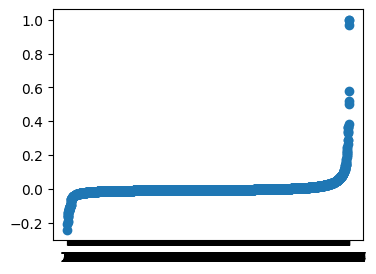

In [24]:
# Plotting the eigenvalues
plt.rcParams["figure.figsize"] = (4,3)
plt.scatter(range(len(e)), e);
plt.xticks(range(0,len(e)));

In [25]:
# Gaps in eigenvalues
gaps = np.diff(e)
eigen_gap_df = pd.DataFrame({'Index': range(len(e) - 1), 'Gap': gaps})
eigen_gap_df.sort_values(by='Gap', ascending=False, inplace=True)

In [26]:
eigen_gap_df

Index           Gap
2704   2704  3.918217e-01
2701   2701  1.210177e-01
2703   2703  6.077478e-02
2694   2694  4.015015e-02
0         0  3.161819e-02
...     ...           ...
1704   1704  2.233622e-07
1031   1031  1.726841e-07
969     969  1.608088e-07
1289   1289  1.262306e-07
1068   1068  9.509806e-08

[2707 rows x 2 columns]

In [27]:
eigen_gap_df[eigen_gap_df['Index'] < 10]

Index       Gap
0      0  0.031618
3      3  0.021224
1      1  0.014777
8      8  0.010377
5      5  0.007633
2      2  0.006782
6      6  0.005522
7      7  0.001493
4      4  0.001188
9      9  0.000930

In [29]:
# Eigen features for k
k = 7
X = v[:, -1*k:]